In [1]:
import pandas as pd

In [2]:
telco = pd.read_csv(r"C:\Users\Chiselas\Assignments\Assignment 4\WA_Fn-UseC_-Telco-Customer-Churn.csv")
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
telco.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
telco["InternetService"].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [6]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
telco["TotalCharges"].value_counts()

           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
1901        1
44.05       1
3309.25     1
937.1       1
107.1       1
Name: TotalCharges, Length: 6531, dtype: int64

In [8]:
def Remove_string(amount):
    if amount == " ":
        return 0
    else:
        return amount

telco['TotalCharges'] = telco['TotalCharges'].apply(lambda x: f"{Remove_string(x)}")

In [9]:
telco["TotalCharges"].value_counts()

20.2       11
0          11
19.75       9
20.05       8
19.9        8
           ..
4399.5      1
1901        1
44.05       1
3309.25     1
107.1       1
Name: TotalCharges, Length: 6531, dtype: int64

In [10]:
telco["TotalCharges"] = pd.to_numeric(telco["TotalCharges"])

In [11]:
telco["TotalCharges"].dtypes

dtype('float64')

In [12]:
#Q1.a) Non-senior citizen Females and Males
#Q1.b) Senior Citizens because they have a higher churn rate

telco.groupby(['gender', 'SeniorCitizen', 'Churn'])['Churn'].count().unstack()

Churn                   No  Yes
gender SeniorCitizen           
Female 0              2221  699
       1               328  240
Male   0              2287  694
       1               338  236

In [13]:
#Q2.a) Phone Service, Internet Service, StreaamingTV because they have a higher correlation with high Monthly charges where people have left.

telco_Churn= telco[telco["Churn"]== "Yes"]
telco_Churn_max = telco_Churn[telco_Churn["MonthlyCharges"] > telco_Churn["MonthlyCharges"].mean()]
telco_Churn_max.groupby(['PhoneService', 'InternetService','TechSupport', 'StreamingTV', 'StreamingMovies', 'DeviceProtection', 'OnlineBackup'])['MonthlyCharges'].count().unstack()


OnlineBackup                                                                              No  \
PhoneService InternetService TechSupport StreamingTV StreamingMovies DeviceProtection          
Yes          DSL             No          Yes         Yes             No                  NaN   
                                                                     Yes                 2.0   
                             Yes         No          Yes             Yes                 NaN   
                                         Yes         No              No                  NaN   
                                                                     Yes                 NaN   
                                                     Yes             No                  3.0   
                                                                     Yes                 5.0   
             Fiber optic     No          No          No              No                 92.0   
                                                                     Yes                34.0   
                                                     Yes             No                100.0   
                                                                     Yes                22.0   
                                         Yes         No              No                 95.0   
                                                                     Yes                24.0   
                                                     Yes             No                136.0   
                                                                     Yes                98.0   
                             Yes         No          No              No                  8.0   
                                                                     Yes                 9.0   
                                                     Yes             No                  5.0   
                                                                     Yes                 7.0   
                                         Yes         No              No                 14.0   
                                                                     Yes                 2.0   
                                                     Yes             No                 25.0   
                                                                     Yes                39.0   

OnlineBackup                                                                            Yes  
PhoneService InternetService TechSupport StreamingTV StreamingMovies DeviceProtection        
Yes          DSL             No          Yes         Yes             No                 1.0  
                                                                     Yes                1.0  
                             Yes         No          Yes             Yes                3.0  
                                         Yes         No              No                 1.0  
                                                                     Yes                1.0  
                                                     Yes             No                 3.0  
                                                                     Yes                2.0  
             Fiber optic     No          No          No              No                50.0  
                                                                     Yes               25.0  
                                                     Yes             No                34.0  
                                                                     Yes               11.0  
                                         Yes         No              No                29.0  
                                                                     Yes               20.0  
                                                     Yes             No                57.0  
                                                                     Yes               82.0  
 

In [15]:
telco_Churn_max["TechSupport1"]= telco_Churn_max["TechSupport"].map({"Yes": 1, "No": 0}) 
telco_Churn_max["StreamingTV1"]= telco_Churn_max["StreamingTV"].map({"Yes": 1, "No": 0}) 
telco_Churn_max["StreamingMovies1"]= telco_Churn_max["StreamingMovies"].map({"Yes": 1, "No": 0}) 
telco_Churn_max["OnlineBackup1"]= telco_Churn_max["OnlineBackup"].map({"Yes": 1, "No": 0}) 
telco_Churn_max["DeviceProtection1"]= telco_Churn_max["DeviceProtection"].map({"Yes": 1, "No": 0}) 
telco_Churn_max["PhoneService1"]= 1
telco_Churn_max["InternetService1"]= 1

<ipython-input-15-a49a46667c27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telco_Churn_max["TechSupport1"]= telco_Churn_max["TechSupport"].map({"Yes": 1, "No": 0})
<ipython-input-15-a49a46667c27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telco_Churn_max["StreamingTV1"]= telco_Churn_max["StreamingTV"].map({"Yes": 1, "No": 0})
<ipython-input-15-a49a46667c27>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

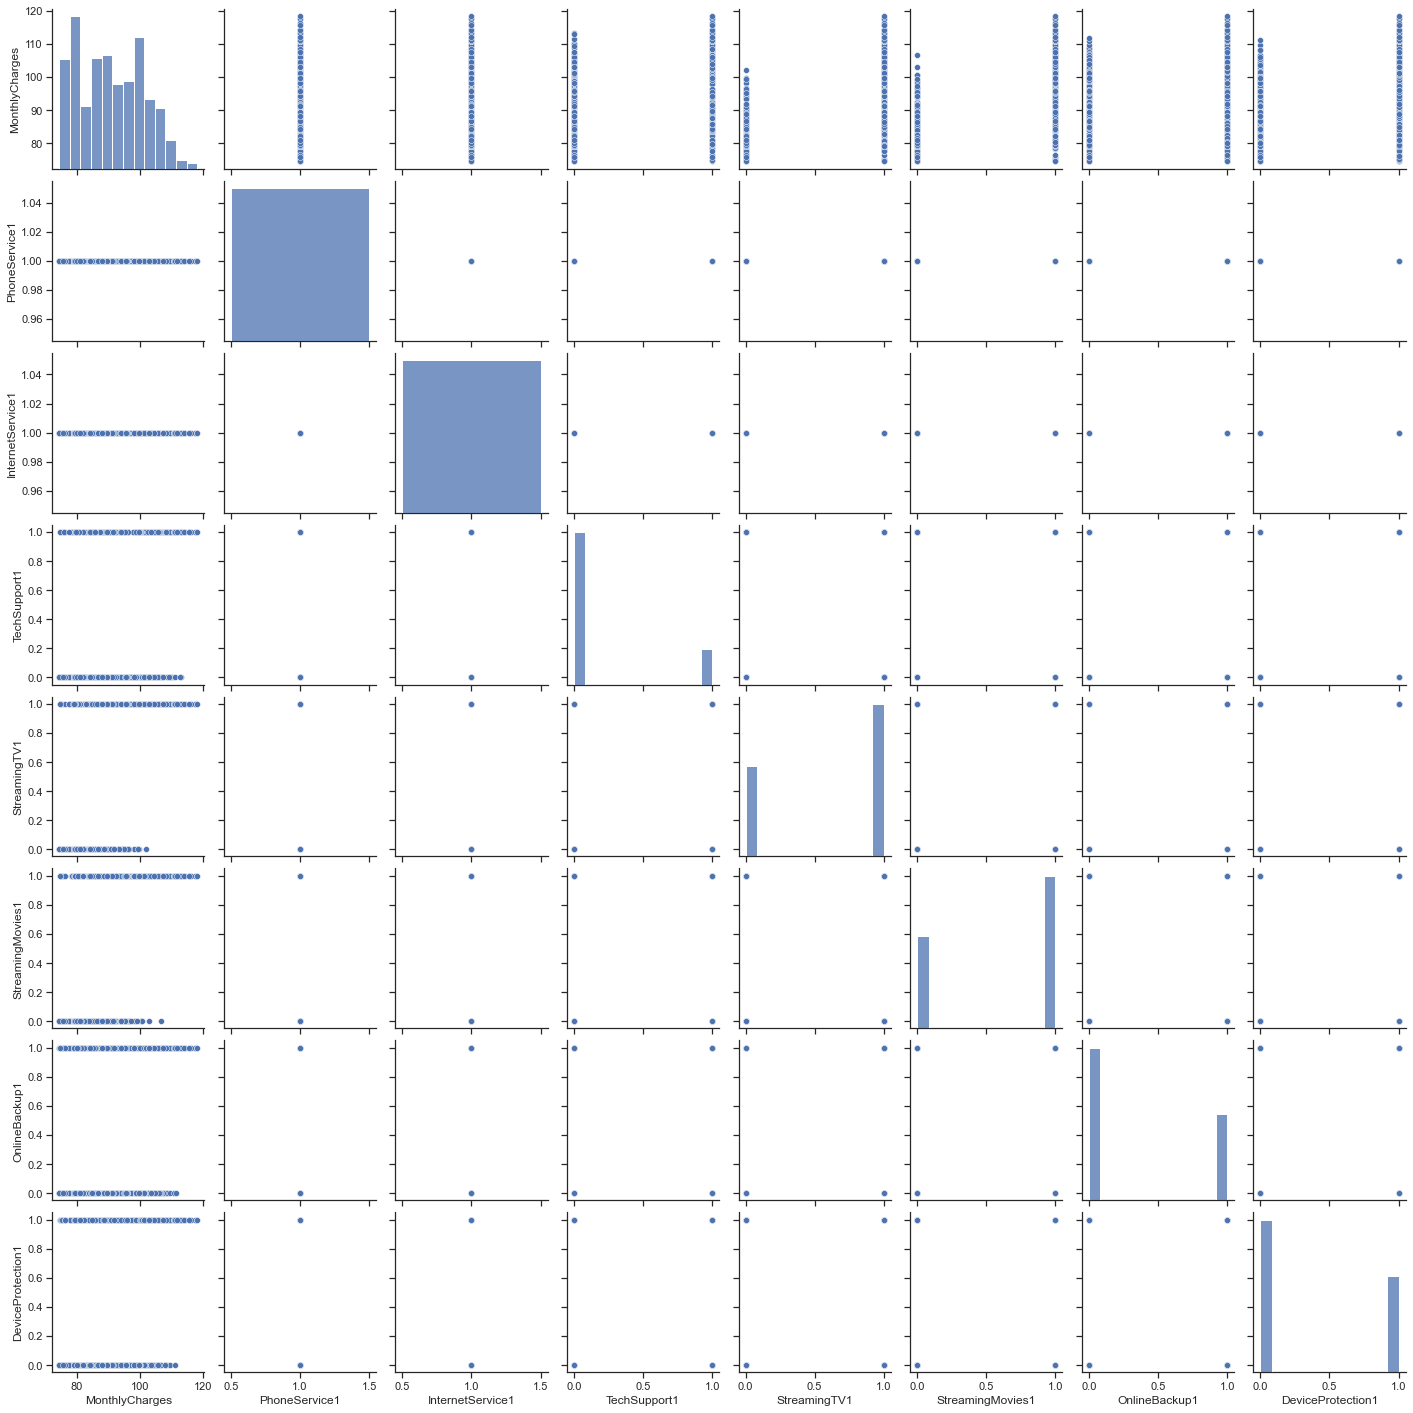

In [16]:
telco_Churn_max1= telco_Churn_max[["MonthlyCharges", "PhoneService1", "InternetService1", "TechSupport1", "StreamingTV1", "StreamingMovies1", "OnlineBackup1", "DeviceProtection1"]].copy()

import seaborn as sns; sns.set(style="ticks", color_codes=True)

g = sns.pairplot(telco_Churn_max1)

In [17]:
#Q2.b) Two year conract because it has the lowest Churn rate
telco.groupby(["PhoneService", "Churn"])["Contract"].value_counts().unstack()

Contract            Month-to-month  One year  Two year
PhoneService Churn                                    
No           No                223       131       158
             Yes               153        14         3
Yes          No               1997      1176      1489
             Yes              1502       152        45

In [18]:
#Q3.a) Basic- $25.10, Plus- $64.45, Premium- $88.4
telco_No_Churn = telco[telco["Churn"]== "No"]
telco_No_Churn[["MonthlyCharges"]].describe()

,MonthlyCharges
count,5174.000000
mean,61.265124
std,31.092648
min,18.250000
25%,25.100000
50%,64.425000
75%,88.400000
max,118.750000


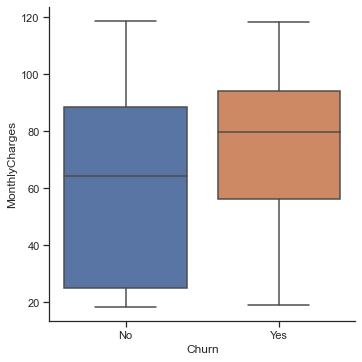

In [19]:
sns.catplot(x="Churn", y = "MonthlyCharges", data = telco, kind = "box")

In [20]:
#Q3.b) No because the people who were not on Paperless billing have a lower churn rate, while those who were on Paperless billing have a much higher churn rate.
telco.groupby(["Contract", "PaperlessBilling"])["Churn"].value_counts().unstack()

Churn                              No   Yes
Contract       PaperlessBilling            
Month-to-month No                 883   406
               Yes               1337  1249
One year       No                 625    48
               Yes                682   118
Two year       No                 895    15
               Yes                752    33

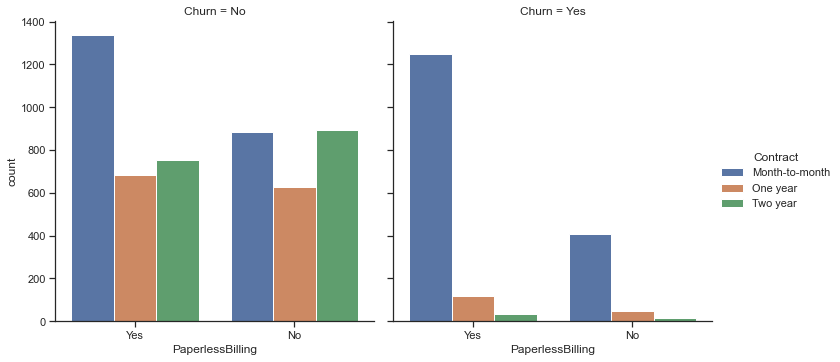

In [21]:
sns.catplot(x="PaperlessBilling",hue="Contract", col= "Churn", data=telco, kind="count")